In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
dframe = pd.read_csv("DoctorVisits-DA.csv")
dframe.head()

Unnamed: 0  visits  gender  age  income  illness  reduced  health private  \
0           1       1  female   19    5500        1        4       1     yes   
1           2       1  female   19    4500        1        2       1     yes   
2           3       1    male   19    9000        3        0       0      no   
3           4       1    male   19    1500        1        0       0      no   
4           5       1    male   19    4500        2        5       1      no   

  freepoor freerepat nchronic lchronic  Unnamed: 13  Unnamed: 14  Unnamed: 15  
0       no        no       no       no          NaN          NaN          NaN  
1       no        no       no       no          NaN          NaN          NaN  
2       no        no       no       no          NaN          NaN          NaN  
3       no        no       no       no          NaN          NaN          NaN  
4       no        no      yes       no          NaN          NaN          NaN

In [3]:
dframe.describe()

Unnamed: 0       visits          age        income      illness  \
count  5190.000000  5190.000000  5190.000000   5190.000000  5190.000000   
mean   2595.500000     0.301734    40.638536   5831.599229     1.431985   
std    1498.368279     0.798134    20.478182   3689.066984     1.384152   
min       1.000000     0.000000    19.000000      0.000000     0.000000   
25%    1298.250000     0.000000    22.000000   2500.000000     0.000000   
50%    2595.500000     0.000000    32.000000   5500.000000     1.000000   
75%    3892.750000     0.000000    62.000000   9000.000000     2.000000   
max    5190.000000     9.000000    72.000000  15000.000000     5.000000   

           reduced       health  Unnamed: 13  Unnamed: 14  Unnamed: 15  
count  5190.000000  5190.000000          0.0          0.0          1.0  
mean      0.861850     1.217534          NaN          NaN      10000.0  
std       2.887628     2.124266          NaN          NaN          NaN  
min       0.000000     0.000000          NaN          NaN      10000.0  
25%       0.000000     0.000000          NaN          NaN      10000.0  
50%       0.000000     0.000000          NaN          NaN      10000.0  
75%       0.000000     2.000000          NaN          NaN      10000.0  
max      14.000000    12.000000          NaN          NaN      10000.0

In [12]:
dframe.drop('Unnamed: 14' , axis='columns', inplace=True)
dframe.drop('Unnamed: 15' , axis='columns', inplace=True)

In [13]:
dframe.head()

Unnamed: 0  visits  gender  age  income  illness  reduced  health private  \
0           1       1  female   19    5500        1        4       1     yes   
1           2       1  female   19    4500        1        2       1     yes   
2           3       1    male   19    9000        3        0       0      no   
3           4       1    male   19    1500        1        0       0      no   
4           5       1    male   19    4500        2        5       1      no   

  freepoor freerepat nchronic lchronic  
0       no        no       no       no  
1       no        no       no       no  
2       no        no       no       no  
3       no        no       no       no  
4       no        no      yes       no

In [14]:
dframe1 = dframe.drop_duplicates()

In [15]:
print('No. of duplicates :' , dframe.shape[0] - dframe1.shape[0])

No. of duplicates : 0


In [16]:
dframe1.head()

Unnamed: 0  visits  gender  age  income  illness  reduced  health private  \
0           1       1  female   19    5500        1        4       1     yes   
1           2       1  female   19    4500        1        2       1     yes   
2           3       1    male   19    9000        3        0       0      no   
3           4       1    male   19    1500        1        0       0      no   
4           5       1    male   19    4500        2        5       1      no   

  freepoor freerepat nchronic lchronic  
0       no        no       no       no  
1       no        no       no       no  
2       no        no       no       no  
3       no        no       no       no  
4       no        no      yes       no

C:\Users\windows 10\AppData\Local\Temp\ipykernel_12452\3713888287.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'gender' ,  x = 'reduced', data= dframe1 , palette='Set2')


Text(0, 0.5, "Patient's Gender")

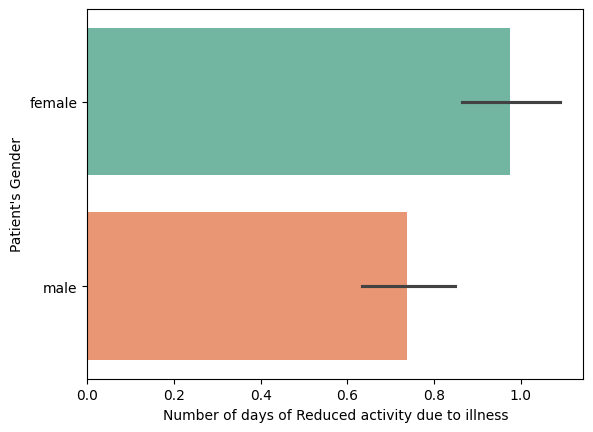

In [ ]:
sns.barplot(y = 'gender' ,  x = 'reduced', data= dframe1 , palette='Set2')
plt.xlabel("Number of days of Reduced activity due to illness")
plt.ylabel("Patient's Gender")
plt.title("")

In [69]:
dframe1['reduced']['gender']

KeyError: 'gender'

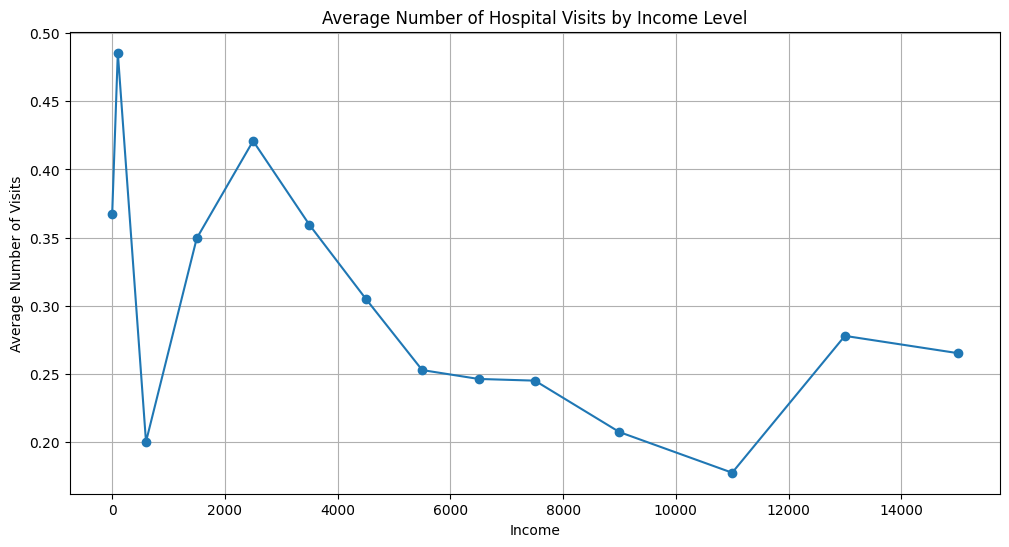

Summary of average visits by income:
   income    visits
0       0  0.367089
1     100  0.485714
2     600  0.200000
3    1500  0.349398
4    2500  0.420921


In [70]:
avg_visits = dframe1.groupby('income')['visits'].mean().reset_index()
avg_visits = avg_visits.sort_values('income')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(avg_visits['income'], avg_visits['visits'], marker='o')
plt.title('Average Number of Hospital Visits by Income Level')
plt.xlabel('Income')
plt.ylabel('Average Number of Visits')
plt.grid(True)
plt.show()

# Print summary statistics
print("\
Summary of average visits by income:")
print(avg_visits.head())

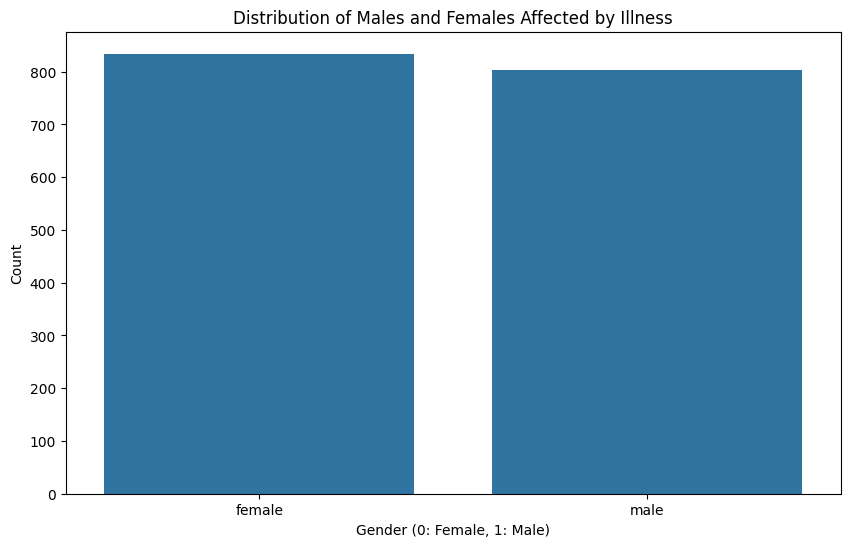

Count of Males and Females affected by illness:
Females (0): 834
Males (1): 804


C:\Users\windows 10\AppData\Local\Temp\ipykernel_12452\1076342546.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Females (0):", gender_illness[0])
C:\Users\windows 10\AppData\Local\Temp\ipykernel_12452\1076342546.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Males (1):", gender_illness[1])


In [72]:
gender_illness = dframe1[dframe1['illness'] == 1]['gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=dframe1[dframe1['illness'] == 1], x='gender')
plt.title('Distribution of Males and Females Affected by Illness')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

# Print the counts
print("\
Count of Males and Females affected by illness:")
print("Females (0):", gender_illness[0])
print("Males (1):", gender_illness[1])

C:\Users\windows 10\AppData\Local\Temp\ipykernel_12452\2099044790.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dframe1['freepoor'] = pd.to_numeric(dframe1['freepoor'].replace({'yes': 1, 'no': 0}))
C:\Users\windows 10\AppData\Local\Temp\ipykernel_12452\2099044790.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dframe1['freerepat'] = pd.to_numeric(dframe1['freerepat'].replace({'yes': 1, 'no': 0}))
C:\Users\windows 10\AppData\Local\Temp\ipykernel_12452\2099044790.py:3: FutureWarning: Downcasting behavior in `replace` is de

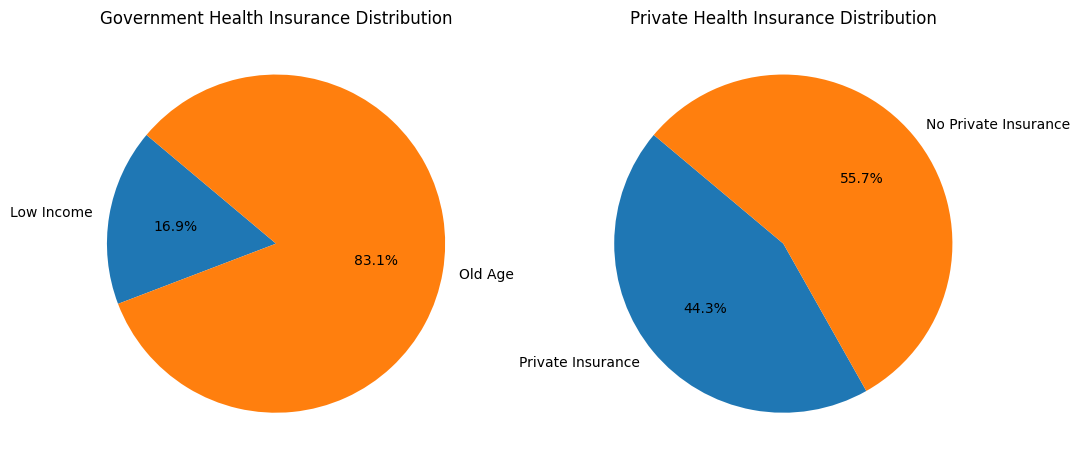

Percentages:
Government Insurance - Low Income: 4.3%
Government Insurance - Old Age: 21.0%
Private Insurance: 44.3%


In [74]:
dframe1['freepoor'] = pd.to_numeric(dframe1['freepoor'].replace({'yes': 1, 'no': 0}))
dframe1['freerepat'] = pd.to_numeric(dframe1['freerepat'].replace({'yes': 1, 'no': 0}))
dframe1['private'] = pd.to_numeric(dframe1['private'].replace({'yes': 1, 'no': 0}))

# Calculate percentages
low_income_insurance = dframe1['freepoor'].mean() * 100
old_age_insurance = dframe1['freerepat'].mean() * 100
private_insurance = dframe1['private'].mean() * 100

# Create a pie chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
labels = ['Low Income', 'Old Age']
sizes = [low_income_insurance, old_age_insurance]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Government Health Insurance Distribution')

# Create pie chart for private insurance
plt.subplot(1, 2, 2)
labels = ['Private Insurance', 'No Private Insurance']
sizes = [private_insurance, 100-private_insurance]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Private Health Insurance Distribution')

plt.show()

print("\
Percentages:")
print(f"Government Insurance - Low Income: {low_income_insurance:.1f}%")
print(f"Government Insurance - Old Age: {old_age_insurance:.1f}%")
print(f"Private Insurance: {private_insurance:.1f}%")   

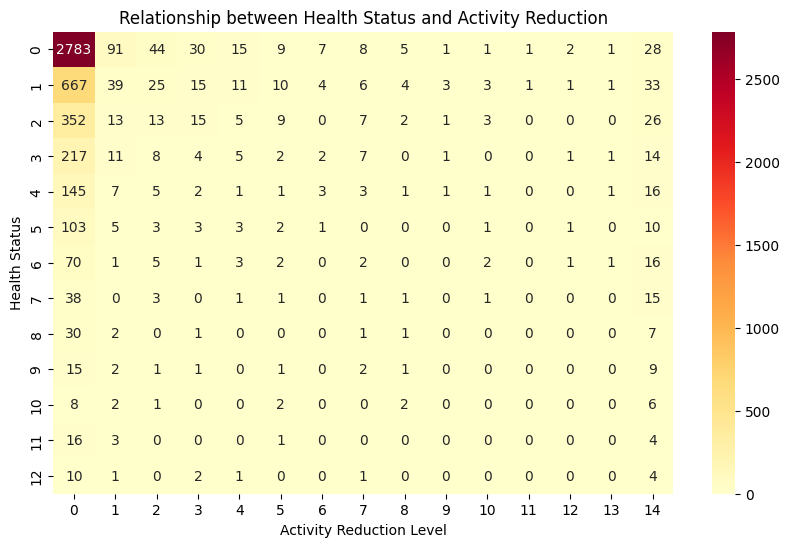

Correlation between Health Status and Activity Reduction: 0.28


In [76]:
# Create a cross-tabulation of health status and activity reduction
heatmap_data = pd.crosstab(dframe1['health'], dframe1['reduced'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Relationship between Health Status and Activity Reduction')
plt.xlabel('Activity Reduction Level')
plt.ylabel('Health Status')
plt.show()

# Print correlation
correlation = dframe1['health'].corr(dframe1['reduced'])
print("\
Correlation between Health Status and Activity Reduction:", round(correlation, 3))